 # **Evaluating cyber security awareness of IT employees**

`Survey results obtained through Google forms Questionnaire:`

`Data source: https://forms.gle/GyEDL4FhExs6GxEz6`

- How old are you?	
- How many years of experience do you have in the IT industry? 	
- Choose your industry domain of work? 	
- Which device(laptop/desktop) are you using to work?	
- Select all commonly used security tools, activities, and applications that are applicable on your working device. (Tick all that apply)
- How secure do you feel your working devices are?	
- I change the passwords of important accounts frequently.	
- I create a password that contains my personal information (e.g. name, date of birth, nickname)	 
- I check the legitimacy of a website before accessing it	
- I am careful about clicking on links in an email, pop-up screens, advertisements on web pages, or social media posts.	
- I manually lock my computer screen when I step away from it.	
- If I discover a security problem such as phishing mail, identity theft, malware etc:	
- I attend security awareness programs conducted by my organization 	
- I always follow the information security policies (ISP) of my organization. (such as data disclosure, desktop security, etc)	
- How do you keep yourself updated about cyberattacks/cybersecurity? (Tick all that apply)	
- The IT employees have a major impact on an organization's cyber security.	
- I believe the cyber security awareness of my colleagues/friends affects my cyber security awareness too.	
- I am concerned that my working environment is not secure enough against cyber attacks.	
- I feel that the risk of becoming a victim of cybercrime has increased in the past years.	
- I believe that the ISPs (Information Security Policies) of my organization are effective in managing cybersecurity.	
- I feel my organization is good at providing cyber security awareness to employees.	
- I am willing to accept increased Internet surveillance from my organization if it can enhance Internet security	
- Have you ever come across security breaches such as phishing emails, identity theft, malware, etc?	
- If Yes, How did you solve it? (select all that apply)


In [1]:
# step 1:  Importing all required libraries
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
import joypy as jp
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

RSEED = 8

## **`Step 1: Loading the data.`**

In [2]:
# reading the csv file
dataset = pd.read_csv("Survey_Data.csv", sep=";", header=0, skipinitialspace = True)

In [3]:
((dataset.shape),(type(dataset)))

((117, 25), pandas.core.frame.DataFrame)

In [4]:
# delete column 'timestamp' as it is no longer required
dataset.drop('Timestamp', inplace=True, axis=1)

In [5]:
dataset.head(2)

,How old are you?,How many years of experience do you have in the IT industry?,Choose your industry domain of work?,Which device(laptop/desktop) are you using to work?,"Select all commonly used security tools, activities, and applications that are applicable on your working device. (Tick all that apply)",How secure do you feel your working devices are?,I change the passwords of important accounts frequently.,"I create a password that contains my personal information (e.g. name, date of birth, nickname)",I check the legitimacy of a website before accessing it,"I am careful about clicking on links in an email, pop-up screens, advertisements on web pages, or social media posts.",...,How do you keep yourself updated about cyberattacks/cybersecurity? (Tick all that apply),The IT employees have a major impact on an organization's cyber security.,I believe the cyber security awareness of my colleagues/friends affects my cyber security awareness too.,I am concerned that my working environment is not secure enough against cyber attacks.,I feel that the risk of becoming a victim of cybercrime has increased in the past years.,I believe that the ISPs (Information Security Policies) of my organization are effective in managing cybersecurity.,I feel my organization is good at providing cyber security awareness to employees.,I am willing to accept increased Internet surveillance from my organization if it can enhance Internet security,"Have you ever come across security breaches such as phishing emails, identity theft, malware, etc?","If Yes, How did you solve it? (select all that apply)"
0,20 - 25 y.o,0 - 3 years,"Banking, Finance Services and Insurance.",Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Somewhat secure,Often,Often,Sometimes,Often,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Agree,Agree,Agree partially,Agree partially,Strongly Agree,Yes,I fixed the problem by myself
1,31 - 35 y.o,10 - 15 years,Transportation & Communication,Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Very Secure,Often,Sometimes,Often,Always,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Disagree,Agree,Agree partially,Agree partially,Agree partially,Yes,I reported it to authorised authority like IT ...


## **`Step 2: Data Preprocessing.`**

### **2a: Renaming the column names**

In [6]:
dataset.columns

Index(['How old are you?',
       'How many years of experience do you have in the IT industry? ',
       'Choose your industry domain of work? ',
       'Which device(laptop/desktop) are you using to work?',
       'Select all commonly used security tools, activities, and applications that are applicable on your working device. (Tick all that apply)',
       'How secure do you feel your working devices are?',
       'I change the passwords of important accounts frequently.',
       'I create a password that contains my personal information (e.g. name, date of birth, nickname)',
       'I check the legitimacy of a website before accessing it',
       'I am careful about clicking on links in an email, pop-up screens, advertisements on web pages, or social media posts.',
       'I manually lock my computer screen when I step away from it.',
       'If I discover a security problem such as phishing mail, identity theft, malware etc:',
       'I attend security awareness programs conducted

In [7]:
# Rename the columns
column_list = ['Age', 'Experience', 'industry', 'device_type', 'security_tools','device_security','chg_pwd_frequency','weak_pwd','legitimacy_chk',
                'carefulness_while_browsing','lock_screen_while_away', 'future_response_to_attack', 'attend_security_awarness', 'follow_ISP', 'awarness_resources',
                'Employees_impact','Peer_behavior_impact', 'unsecure_work_envrmnt', 'risk_awarness', 'ISP_efficacy', 'organizations_impact', 
                'accept_orgzatns_intrnt_surveillance', 'previous_experience', 'response_to_attack']
dataset.columns = column_list

In [8]:
dataset.head(3)

,Age,Experience,industry,device_type,security_tools,device_security,chg_pwd_frequency,weak_pwd,legitimacy_chk,carefulness_while_browsing,...,awarness_resources,Employees_impact,Peer_behavior_impact,unsecure_work_envrmnt,risk_awarness,ISP_efficacy,organizations_impact,accept_orgzatns_intrnt_surveillance,previous_experience,response_to_attack
0,20 - 25 y.o,0 - 3 years,"Banking, Finance Services and Insurance.",Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Somewhat secure,Often,Often,Sometimes,Often,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Agree,Agree,Agree partially,Agree partially,Strongly Agree,Yes,I fixed the problem by myself
1,31 - 35 y.o,10 - 15 years,Transportation & Communication,Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Very Secure,Often,Sometimes,Often,Always,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Disagree,Agree,Agree partially,Agree partially,Agree partially,Yes,I reported it to authorised authority like IT ...
2,26 - 30 y.o,4 - 9 years,"Banking, Finance Services and Insurance.",Company provided device,"Authentication (eg. Passwords,PIN), Encryption...",Somewhat insecure,Never,Never,Often,Always,...,"Internet, website, email bulletins, blogs, etc...",Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Yes,I reported it to authorised authority like IT ...


### **2b: Redefining the column type**

In [9]:
dataset["Age"] = dataset["Age"].astype('category')
dataset["Experience"] = dataset["Experience"].astype('category')
dataset["industry"] = dataset["industry"].astype('category')
dataset["device_type"] = dataset["device_type"].astype('category')
dataset["security_tools"] = dataset["security_tools"].astype(str)
dataset["device_security"] = dataset["device_security"].astype('category')
dataset["chg_pwd_frequency"] = dataset["chg_pwd_frequency"].astype('category')
dataset["weak_pwd"] = dataset["weak_pwd"].astype('category')
dataset["legitimacy_chk"] = dataset["legitimacy_chk"].astype('category')
dataset["carefulness_while_browsing"] = dataset["carefulness_while_browsing"].astype('category')
dataset["lock_screen_while_away"] = dataset["lock_screen_while_away"].astype('category')
dataset["future_response_to_attack"] = dataset["future_response_to_attack"].astype(str)
dataset["attend_security_awarness"] = dataset["attend_security_awarness"].astype('category')
dataset["follow_ISP"] = dataset["follow_ISP"].astype('category')
dataset["awarness_resources"] = dataset["awarness_resources"].astype(str)
dataset["Employees_impact"] = dataset["Employees_impact"].astype('category')
dataset["Peer_behavior_impact"] = dataset["Peer_behavior_impact"].astype('category')
dataset["unsecure_work_envrmnt"] = dataset["unsecure_work_envrmnt"].astype('category')
dataset["risk_awarness"] = dataset["risk_awarness"].astype('category')
dataset["ISP_efficacy"] = dataset["ISP_efficacy"].astype('category')
dataset["organizations_impact"] = dataset["organizations_impact"].astype('category')
dataset["accept_orgzatns_intrnt_surveillance"] = dataset["accept_orgzatns_intrnt_surveillance"].astype('category')
dataset["previous_experience"] = dataset["previous_experience"].astype('category')
dataset["response_to_attack"] = dataset["response_to_attack"].astype(str)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  117 non-null    category
 1   Experience                           117 non-null    category
 2   industry                             117 non-null    category
 3   device_type                          117 non-null    category
 4   security_tools                       117 non-null    object  
 5   device_security                      117 non-null    category
 6   chg_pwd_frequency                    117 non-null    category
 7   weak_pwd                             117 non-null    category
 8   legitimacy_chk                       117 non-null    category
 9   carefulness_while_browsing           117 non-null    category
 10  lock_screen_while_away               117 non-null    category
 11  future_response_to_

## **`Step 2: Data Imputation.`**

### **3a: replacing 'nan' value with 'NA'**

In [11]:
(dataset == "nan").sum()

Age                                     0
Experience                              0
industry                                0
device_type                             0
security_tools                          0
device_security                         0
chg_pwd_frequency                       0
weak_pwd                                0
legitimacy_chk                          0
carefulness_while_browsing              0
lock_screen_while_away                  0
future_response_to_attack               0
attend_security_awarness                0
follow_ISP                              0
awarness_resources                      0
Employees_impact                        0
Peer_behavior_impact                    0
unsecure_work_envrmnt                   0
risk_awarness                           0
ISP_efficacy                            0
organizations_impact                    0
accept_orgzatns_intrnt_surveillance     0
previous_experience                     0
response_to_attack                

In [12]:
# Data imputation --> added value 0 for missing values
dataset.replace(to_replace = 'nan', value = 'NA', inplace = True)
data_imputed = pd.DataFrame(dataset)

In [13]:
(dataset == "nan").sum()

Age                                    0
Experience                             0
industry                               0
device_type                            0
security_tools                         0
device_security                        0
chg_pwd_frequency                      0
weak_pwd                               0
legitimacy_chk                         0
carefulness_while_browsing             0
lock_screen_while_away                 0
future_response_to_attack              0
attend_security_awarness               0
follow_ISP                             0
awarness_resources                     0
Employees_impact                       0
Peer_behavior_impact                   0
unsecure_work_envrmnt                  0
risk_awarness                          0
ISP_efficacy                           0
organizations_impact                   0
accept_orgzatns_intrnt_surveillance    0
previous_experience                    0
response_to_attack                     0
dtype: int64

In [14]:
data_imputed.head(2)

,Age,Experience,industry,device_type,security_tools,device_security,chg_pwd_frequency,weak_pwd,legitimacy_chk,carefulness_while_browsing,...,awarness_resources,Employees_impact,Peer_behavior_impact,unsecure_work_envrmnt,risk_awarness,ISP_efficacy,organizations_impact,accept_orgzatns_intrnt_surveillance,previous_experience,response_to_attack
0,20 - 25 y.o,0 - 3 years,"Banking, Finance Services and Insurance.",Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Somewhat secure,Often,Often,Sometimes,Often,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Agree,Agree,Agree partially,Agree partially,Strongly Agree,Yes,I fixed the problem by myself
1,31 - 35 y.o,10 - 15 years,Transportation & Communication,Company provided device,"Anti-virus, Authentication (eg. Passwords,PIN)...",Very Secure,Often,Sometimes,Often,Always,...,"Internet, website, email bulletins, blogs, etc...",Strongly Agree,Agree,Disagree,Agree,Agree partially,Agree partially,Agree partially,Yes,I reported it to authorised authority like IT ...


### **3b: Defining a class label**

In [15]:
# # data_imputed["monthly rent"] = data_imputed["monthly rent"].astype('int64')
# # rent = data_imputed["monthly rent"]
# data_imputed["coping_appraisal"] = data_imputed["coping_appraisal"].astype('category')
# label = data_imputed["coping_appraisal"]

# conditions = [(((data_imputed['chg_pwd_frequency'] = 'Always') or (data_imputed['chg_pwd_frequency'] = 'Often')) & (data_imputed['weak_pwd'] = 'Never') & (data_imputed['legitimacy_chk'] = 'Always') & (data_imputed['carefulness_while_browsing'] = 'Always')),
#     (data_imputed['chg_pwd_frequency'] = 'Often','Sometimes') & (data_imputed['weak_pwd'] = 'Sometimes') & (data_imputed['legitimacy_chk'] = 'Often','Sometimes') & (data_imputed['carefulness_while_browsing'] = 'Often','Sometimes'),
#     (data_imputed['chg_pwd_frequency'] = 'Sometimes') & (data_imputed['weak_pwd'] = 'Sometimes') & (data_imputed['legitimacy_chk'] = 'Sometimes') & (data_imputed['carefulness_while_browsing'] = 'Sometimes')]
# values = ['High', 'Medium', 'Low']
# data_imputed['coping_appraisal'] = np.select(conditions, values)

## **`Step 3: Data Visualization.`**

A function to add labels to the graph

In [16]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 1
        # Vertical alignment for positive values
        va = 'bottom'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for positive and negative values.

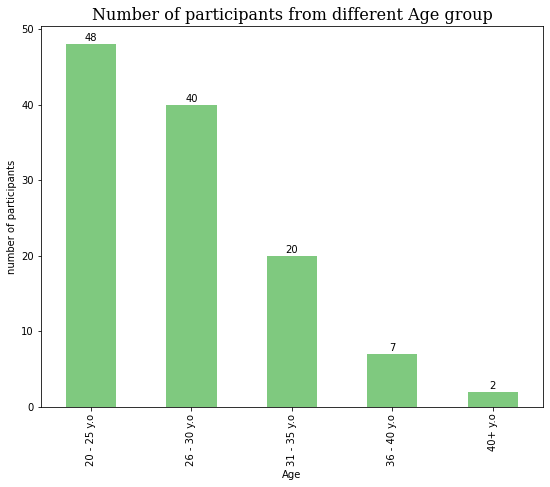

In [17]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plot_data = data_imputed['Age'].value_counts()
a = plot_data.plot(kind='bar', figsize=(9,7), colormap = 'Accent', stacked= True)

# plt.legend(labels=ylabels,bbox_to_anchor =(1.05, 1.25), ncol = 3)
add_value_labels(a)
plt.title('Number of participants from different Age group',fontdict=font)
plt.xlabel('Age')
plt.ylabel('number of participants') 
# a.set_xticklabels(plot_data)
#plt.savefig("rentyearbar.png")
plt.show()

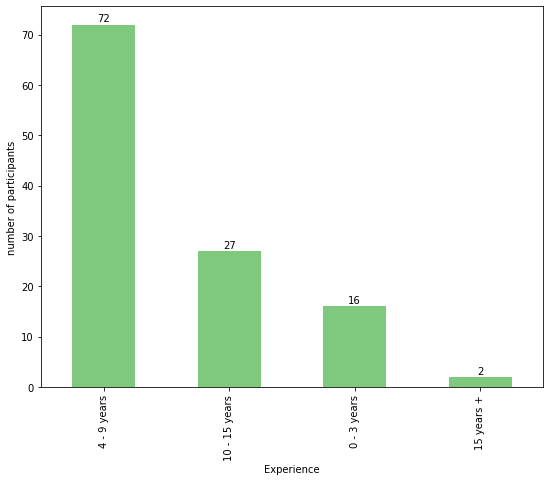

In [18]:
values = ['0 - 3 years', '4 - 9 years', '10 - 15 years', '15 years +']
indx = range(len(values))

plot_data = data_imputed['Experience'].value_counts()

a = plot_data.plot(kind='bar', figsize=(9,7), colormap = 'Accent')  

# plt.legend(labels=ylabels,bbox_to_anchor =(1.05, 1.25), ncol = 3)
add_value_labels(a)
plt.xlabel('Experience')
plt.ylabel('number of participants')
# a.set_xticks(indx,values)
#plt.savefig("rentyearbar.png")
plt.show()

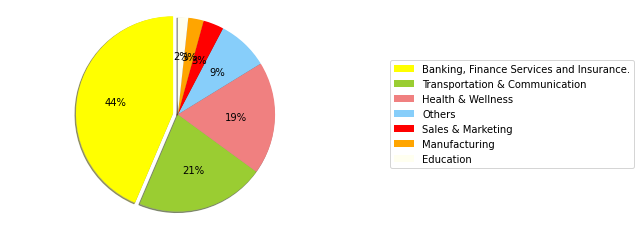

In [19]:
# Data to plot
labels = data_imputed['industry'].unique()
sizes = data_imputed['industry'].value_counts()
colors = ['yellow', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange', 'ivory']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
patches, percentage, text = plt.pie(sizes, explode = explode, colors=colors, autopct='%.0f%%', shadow=True, startangle=90, radius = 2)
plt.legend(patches, labels, bbox_to_anchor=(1,0.3), loc="lower left", fontsize=10,
           bbox_transform=plt.gcf().transFigure)

#plt.title('Monthly rent by year')
plt.axis('equal')
#plt.savefig("rentyearpie.png")
plt.show()